# Decision Tree for N-dimensional data and labels
The code below implements a **decision tree** calculated for labelled data as well as Random Forests.

In [1]:
# Python libraries
import os
from IPython.core.display import Image, display

# Custom libraries
from density_forest.decision_tree_create import *
from density_forest.helpers import *
from density_forest.random_forest import *
from helpers.plots import *
from helpers.create_data import *

### Generate Data

In [42]:
# yoghurt imgures
img_1 = plt.imread('../Presentation/figures/m-classic-joghurt-apfelmango.png')
img_2 = plt.imread('../Presentation/figures/m-classic-joghurt-birchermueesli.png')
img_3 = plt.imread('../Presentation/figures/m-classic-joghurt-ahornsirup-stichfest.png')
img_4 = plt.imread('../Presentation/figures/m-classic-joghurt-new.png')

imgs = [img_1, img_2, img_3]

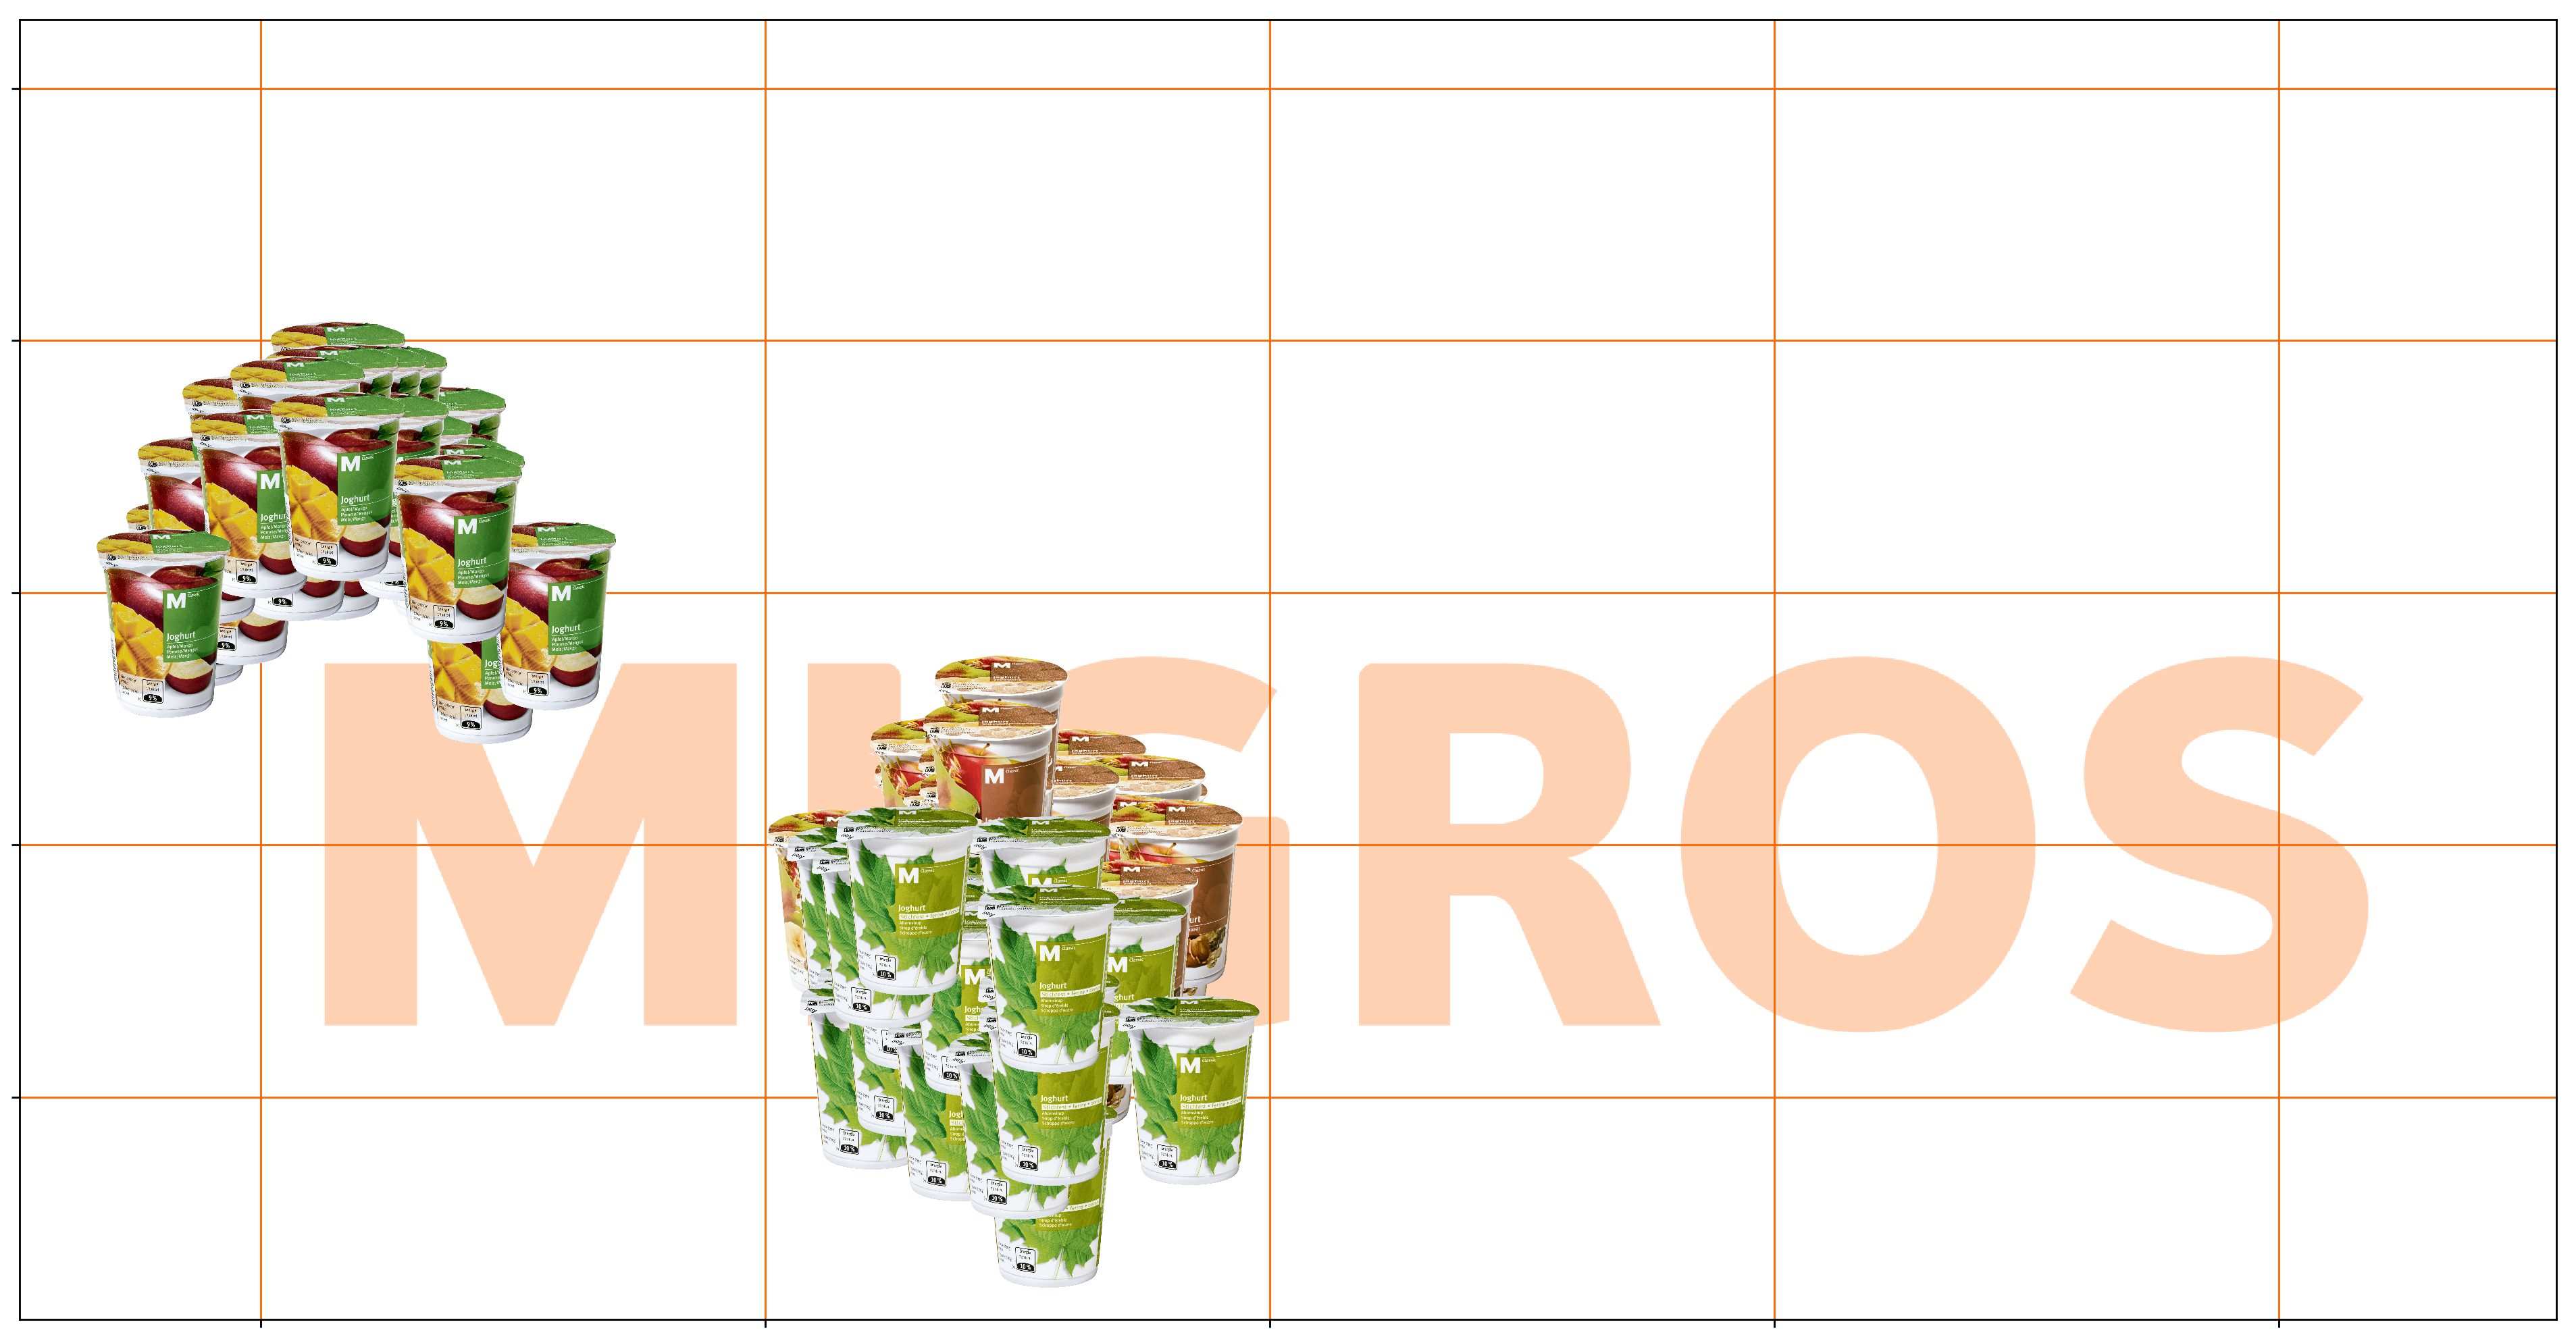

In [29]:
# cluster parameters
nclusters = 3
dimensions = 2
covariance = [10, 5]
minRange = [0,0]
maxRange = [86, 20]
npoints = 100
margin = 5  # for plots
    
dataset = create_data(nclusters, dimensions, covariance, npoints, minrange=minRange, maxrange=maxRange,
                      random_flip=False, nonlinearities = True)

minRange=np.min([minRange, np.min(dataset,0)[:2]], 0)
maxRange=np.max([maxRange, np.max(dataset,0)[:2]], 0)

subset = draw_subsamples(dataset, 0.3)
clusters = np.asarray(data_to_clusters(subset))

fig, ax = plt.subplots(1, 1, dpi=255)
fig.set_size_inches(23,10)
plot_data(clusters, ax, n_clusters=nclusters, minrange=minRange, maxrange=maxRange, margin=margin, imgs=imgs, show_ax_labels=False)
ax.imshow(plt.imread('../Presentation/Figures/migros.png'), zorder=0, extent=[0, 86, 0, 20], alpha=.3)
plt.savefig("../Figures/decision_tree/labelled-data-migros.png", bbox_inches='tight', pad_inches=0)
plt.show()

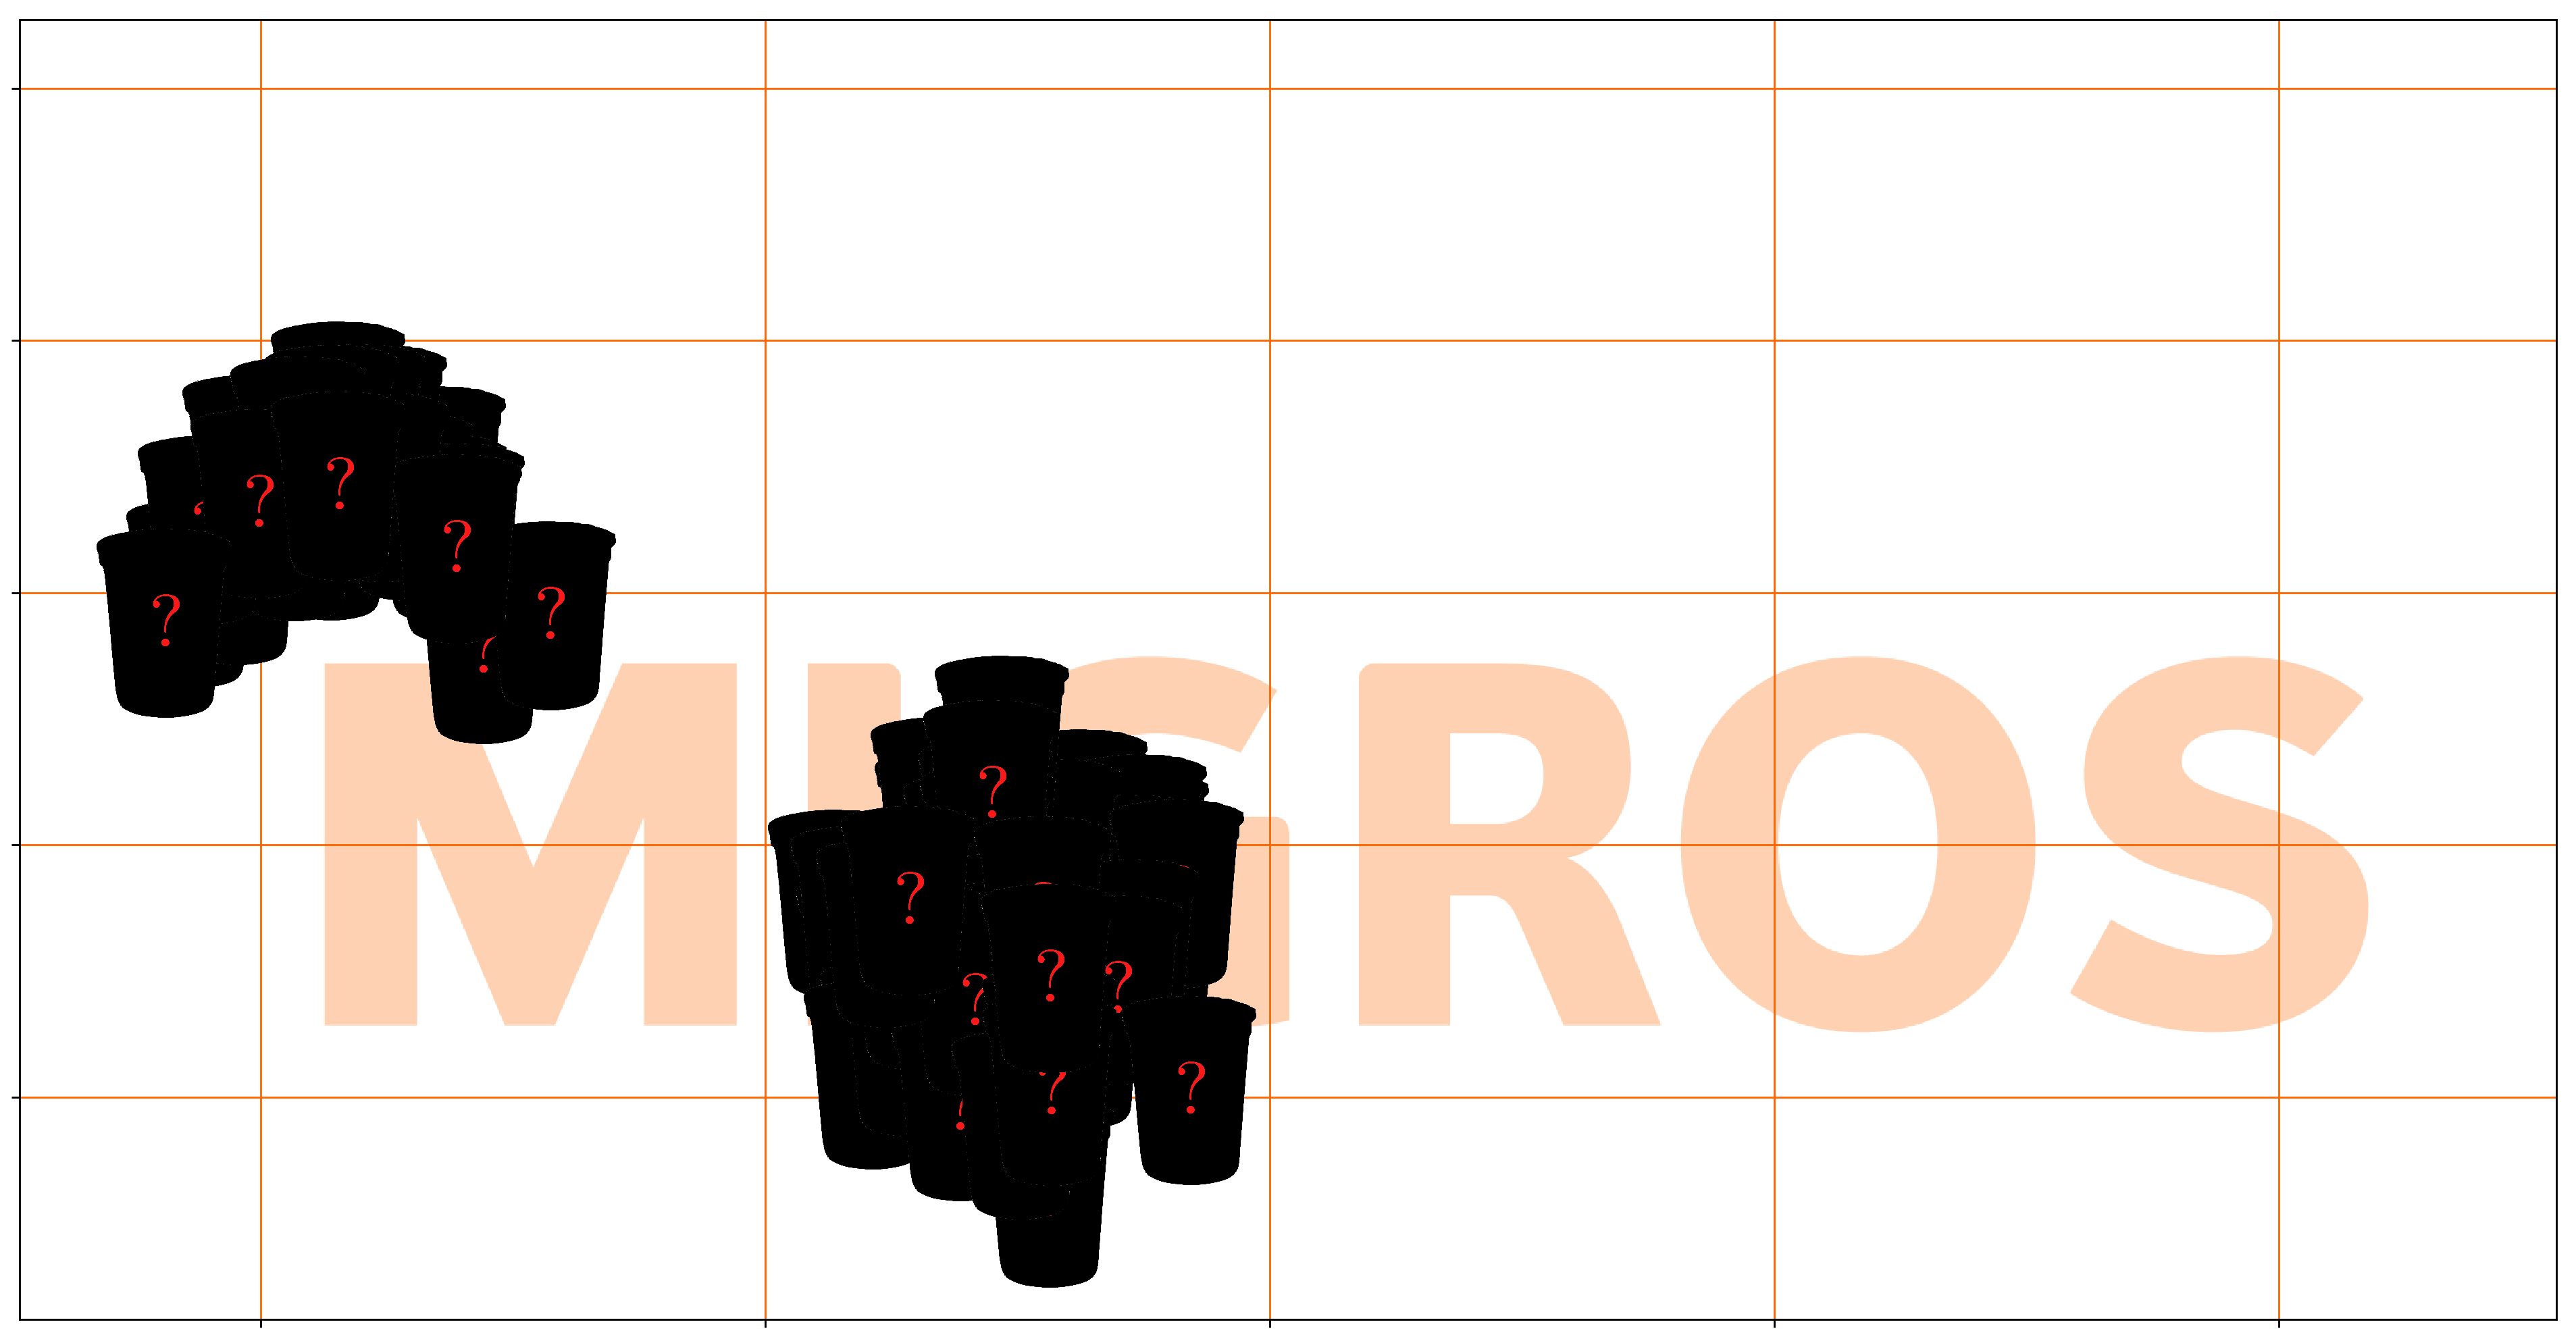

In [43]:
imgs = [img_4, img_4, img_4]

fig, ax = plt.subplots(1, 1, dpi=255)
fig.set_size_inches(23,10)
plot_data(clusters, ax, n_clusters=nclusters, minrange=minRange, maxrange=maxRange, margin=margin, imgs=imgs, show_ax_labels=False)
ax.imshow(plt.imread('../Presentation/Figures/migros.png'), zorder=0, extent=[0, 86, 0, 20], alpha=.3)
plt.savefig("../Figures/decision_tree/labelled-data-migros-new.png", bbox_inches='tight', pad_inches=0)
plt.show()

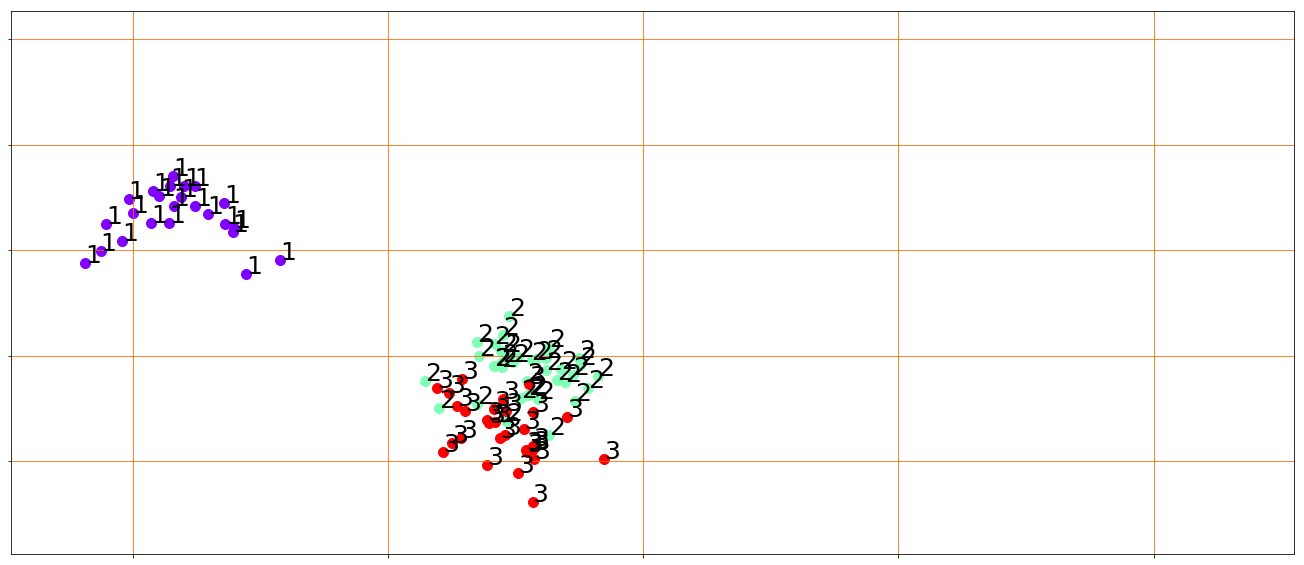

In [30]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(23,10)
plot_data(clusters, ax, n_clusters=nclusters, minrange=minRange, maxrange=maxRange, margin=margin, show_ax_labels=False)
plt.savefig("../Figures/decision_tree/labelled-data.pdf", bbox_inches='tight', pad_inches=0)

### Build a single decision tree


In [31]:
root = create_decision_tree(dataset)

In [32]:
def get_grid_labels(root, minrange, maxrange, rf=False, margin=0):
    """
    get labels on a regular grid
    """
    x_min, x_max = [minrange[0] - margin, maxrange[0] + margin]
    y_min, y_max = [minrange[1] - margin, maxrange[1] + margin]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    dataset_grid = np.transpose([xx.ravel(), yy.ravel()])
    if rf:  # random forest
        dataset_grid_eval = random_forest_traverse(dataset_grid, root)
    else:  # decision tree
        dataset_grid_eval = descend_decision_tree_aux(dataset_grid, root)
    return dataset_grid_eval[:, -1]

def visualize_decision_boundaries(dataset, rootnode, minrange, maxrange, rf=False, savename=None, margin=0):
    """visualize decision boundaries for a given decision tree"""
    # plot data

    clusters = data_to_clusters(dataset)
    dataset_grid_eval = get_grid_labels(rootnode, minrange, maxrange, rf=rf, margin=margin)
    fig, ax = plt.subplots(figsize=(23,10), dpi=255)
    plot_data(clusters, ax, n_clusters=len(clusters), minrange=minrange,
              maxrange=maxrange, margin=margin, grid_eval=dataset_grid_eval, show_data=True)
    if savename is not None:
        plt.savefig(savename[0], bbox_inches='tight', pad_inches=0)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(23,10), dpi=255)
    plot_data(clusters, ax, n_clusters=len(clusters), minrange=minrange,
              maxrange=maxrange, margin=margin, grid_eval=dataset_grid_eval, show_data=False,)
    if savename is not None:
        plt.savefig(savename[1], bbox_inches='tight', pad_inches=0)
    plt.show()

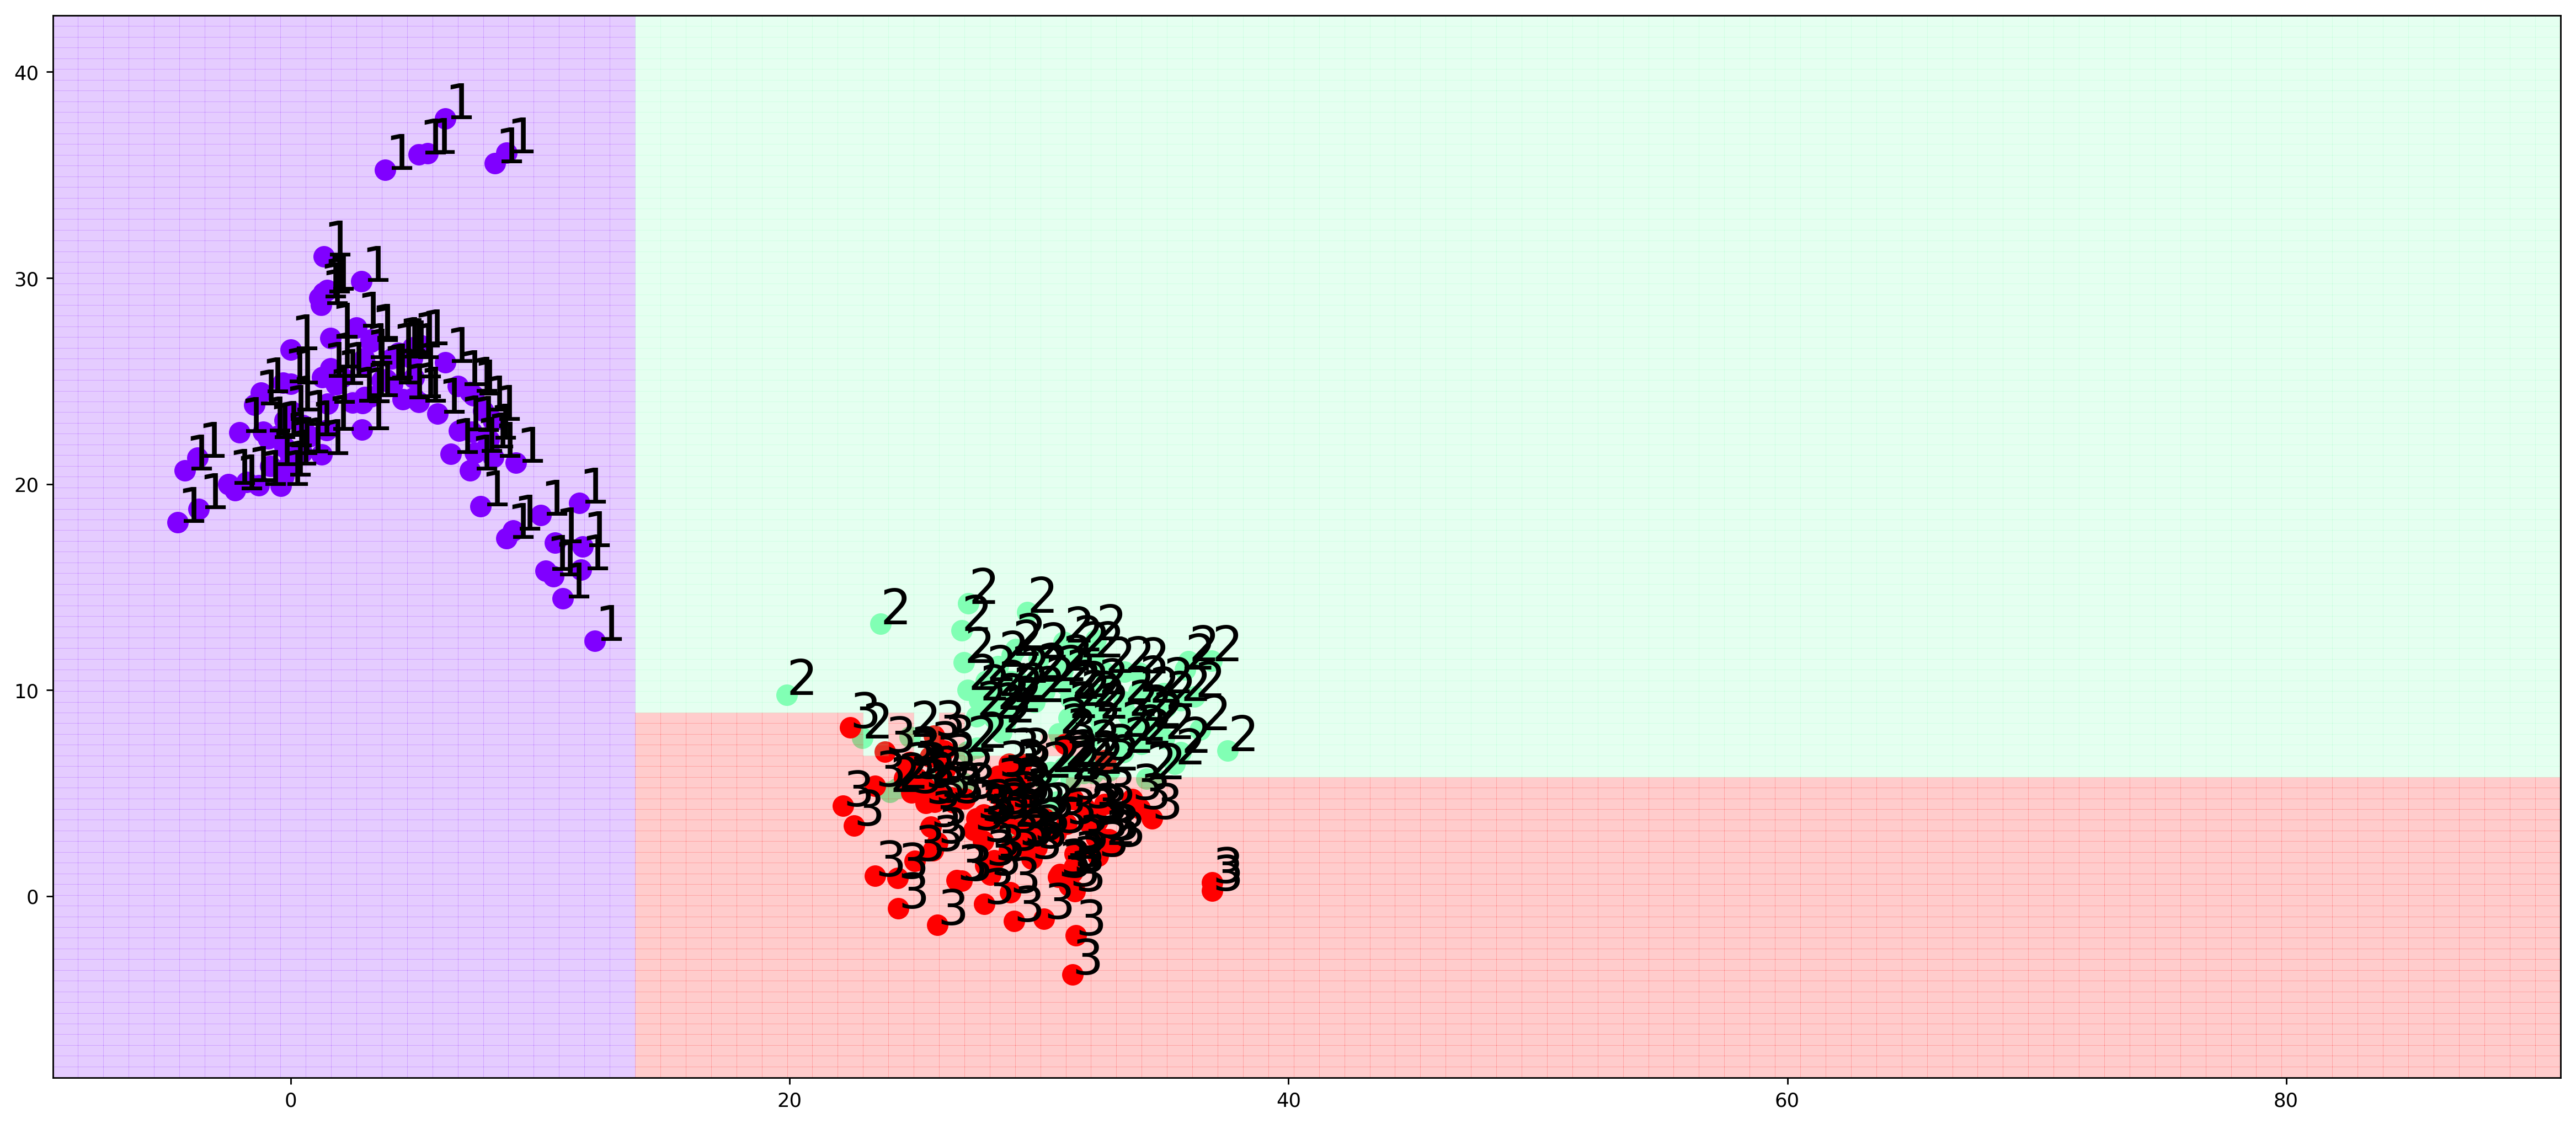

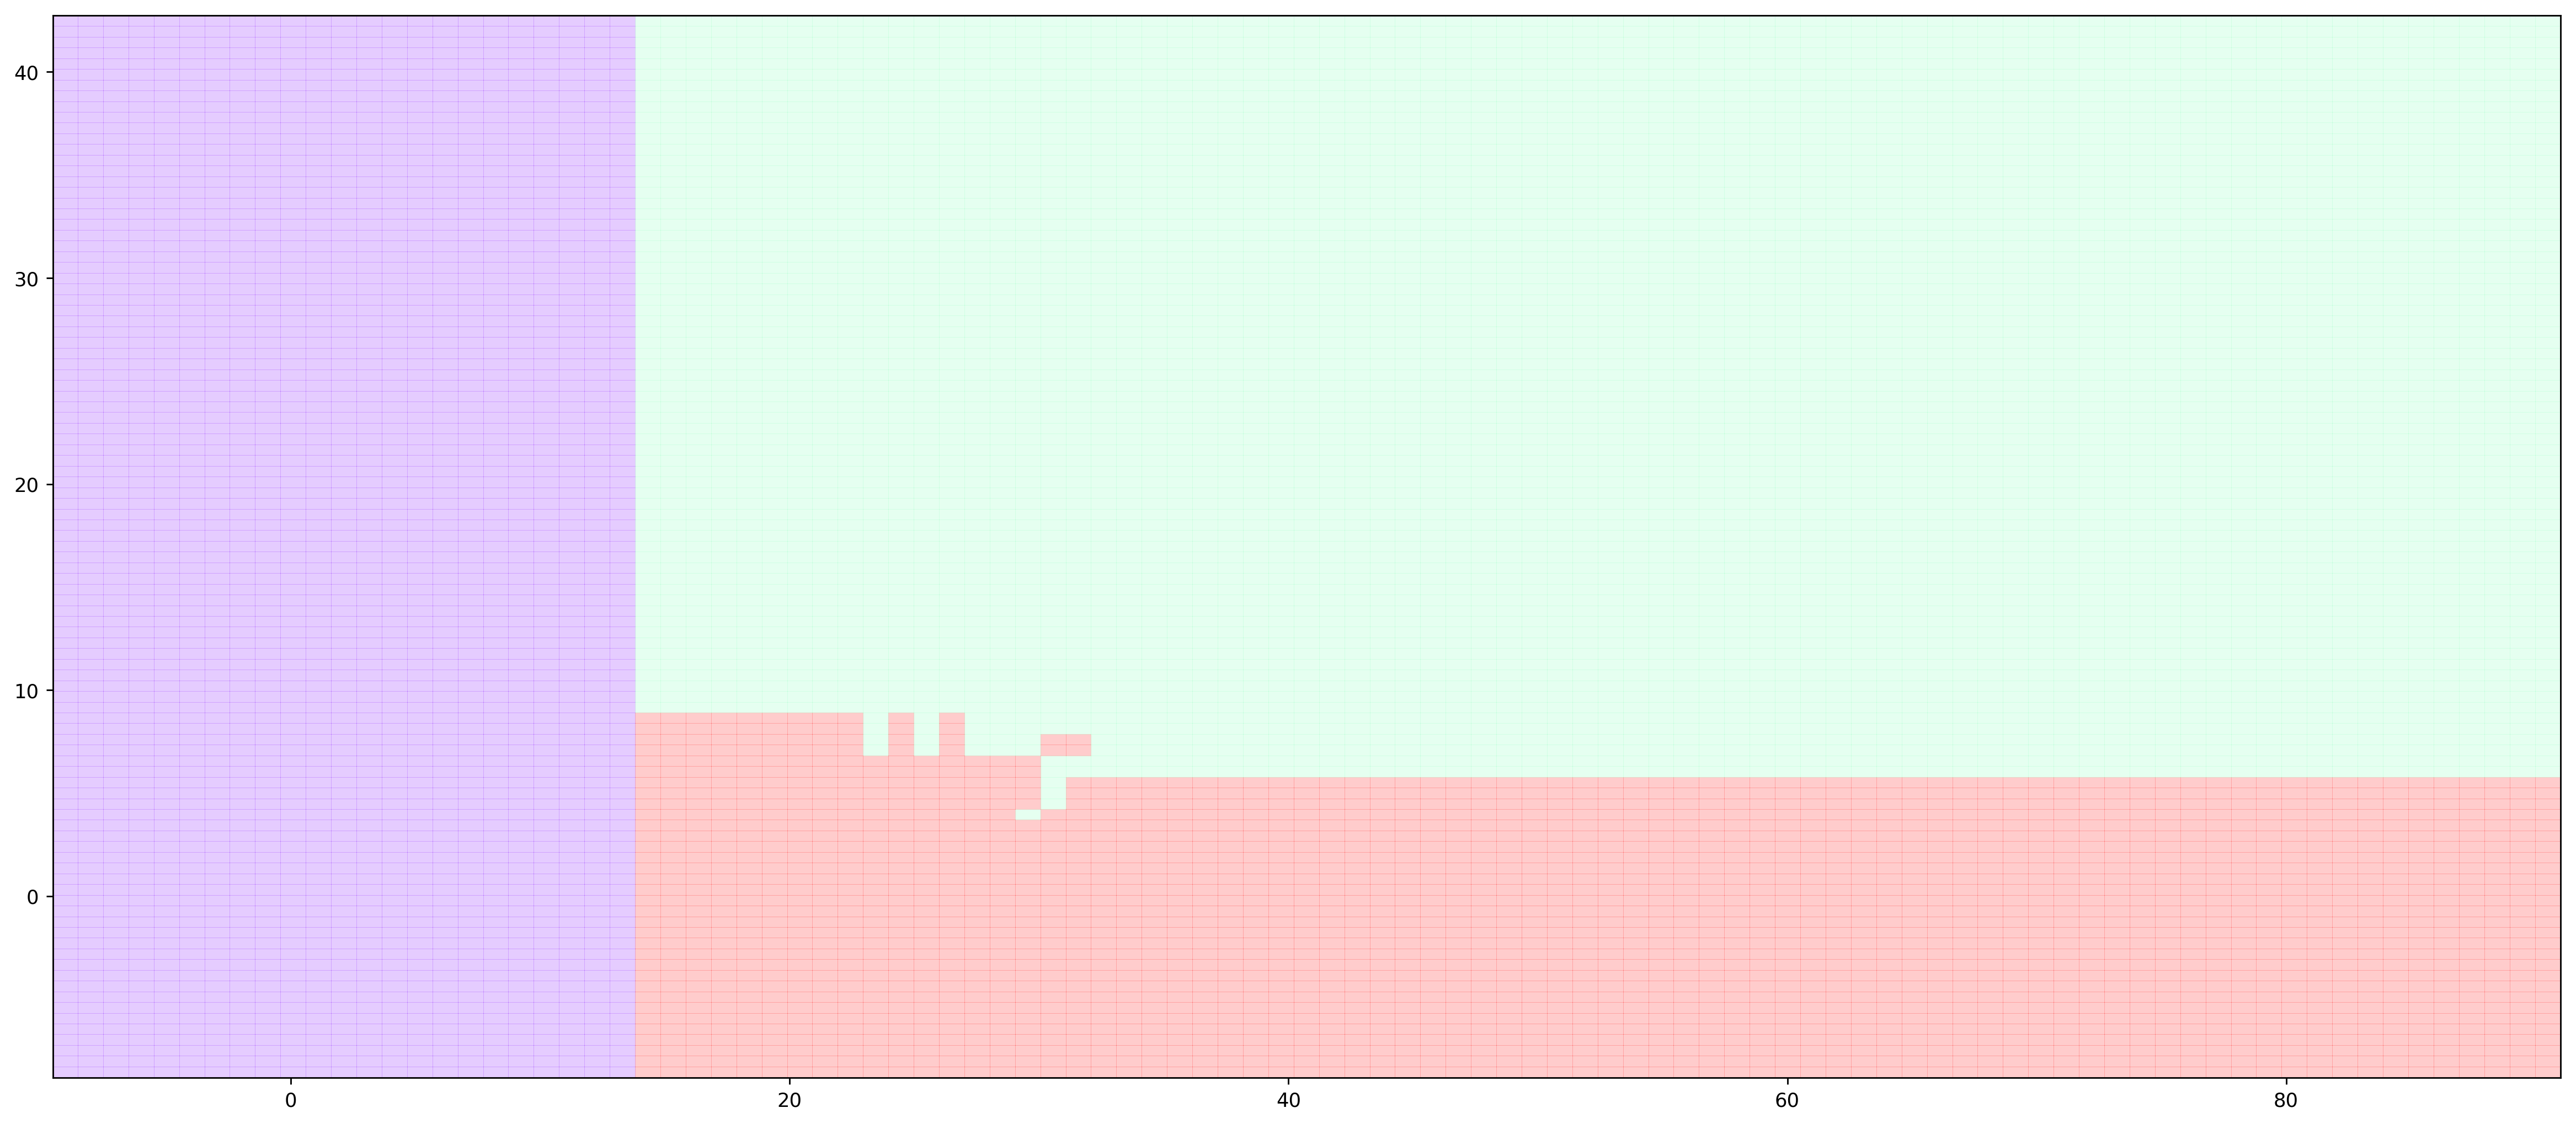

In [33]:
savename=['../Figures/decision_tree/decision_boundaries.pdf', '../Figures/decision_tree/decision_boundaries_nopoints.pdf']
visualize_decision_boundaries(dataset, root, minRange, maxRange, rf=False, margin=margin, savename=savename)

In [34]:
split_vals, split_dims = get_values_preorder(root, [], [])

In [35]:
splits_x = np.asarray(split_vals)[np.equal(split_dims, 0)] 
splits_y = np.asarray(split_vals)[np.equal(split_dims, 1)] 

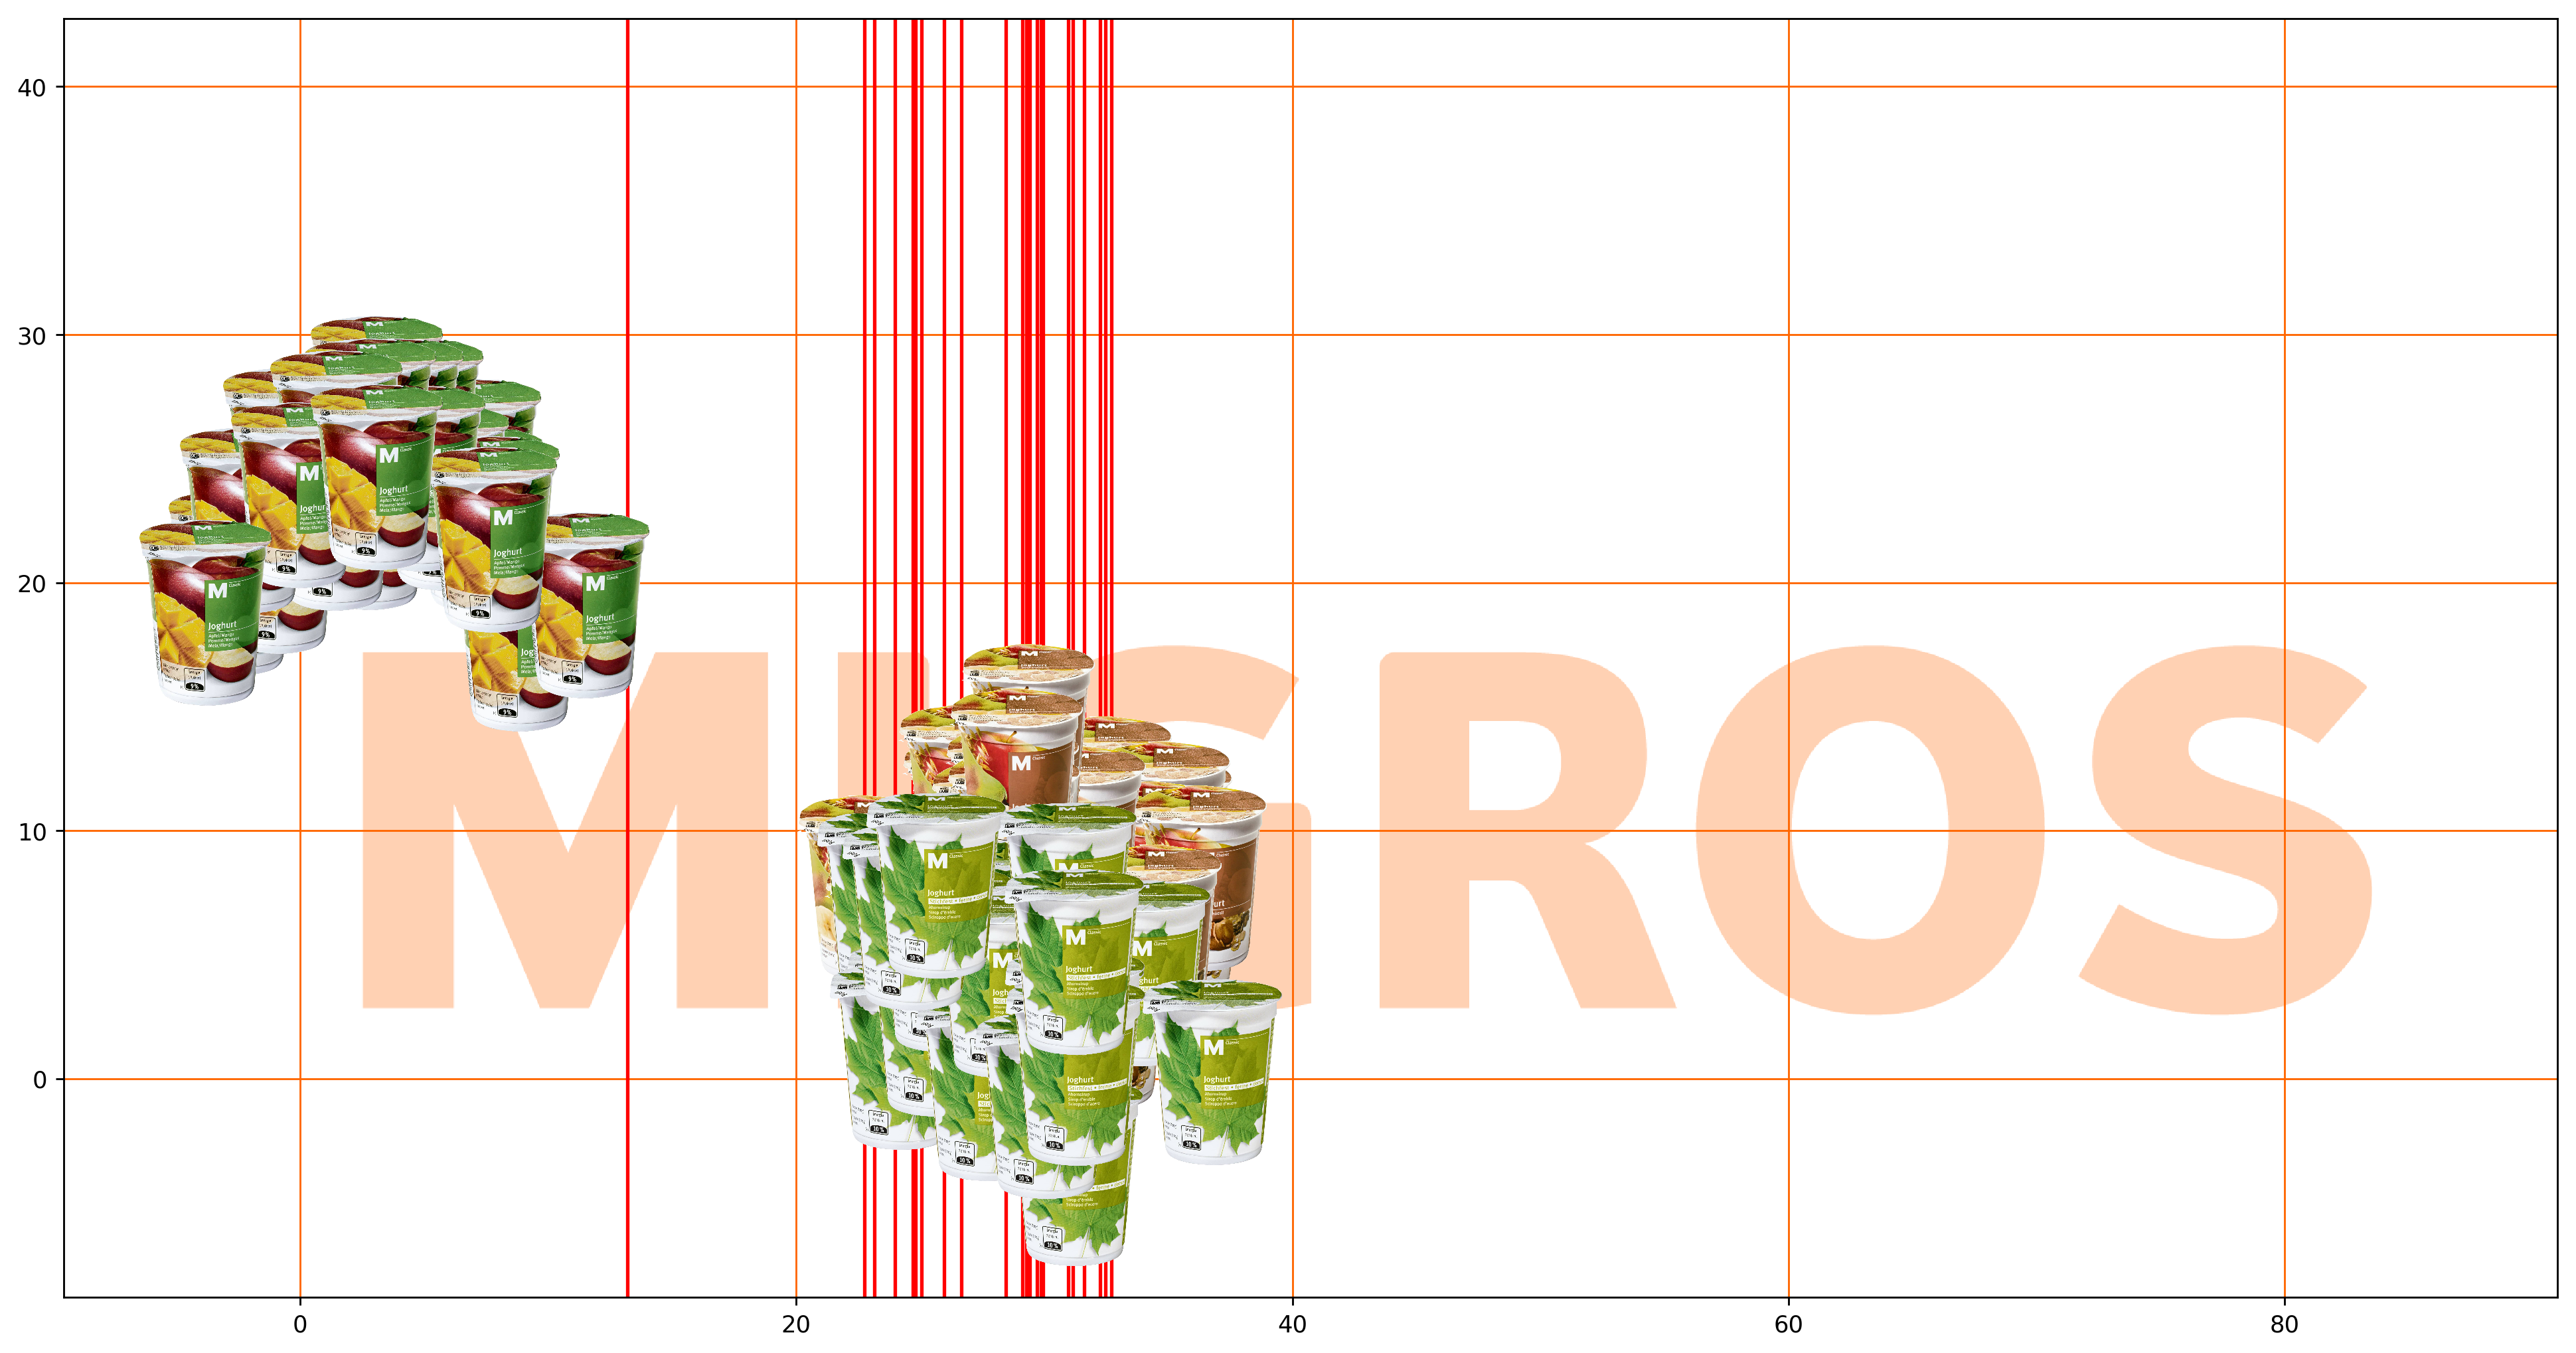

In [36]:
fig, ax = plt.subplots(1, 1, dpi=255)
fig.set_size_inches(23,10)
plot_data(clusters, ax, n_clusters=nclusters, minrange=minRange, maxrange=maxRange, margin=margin, imgs=imgs, lines_x=splits_x)
ax.imshow(plt.imread('../Presentation/Figures/migros.png'), zorder=0, extent=[0, 86, 0, 20], alpha=.3)
plt.show()

# Show Decision Tree

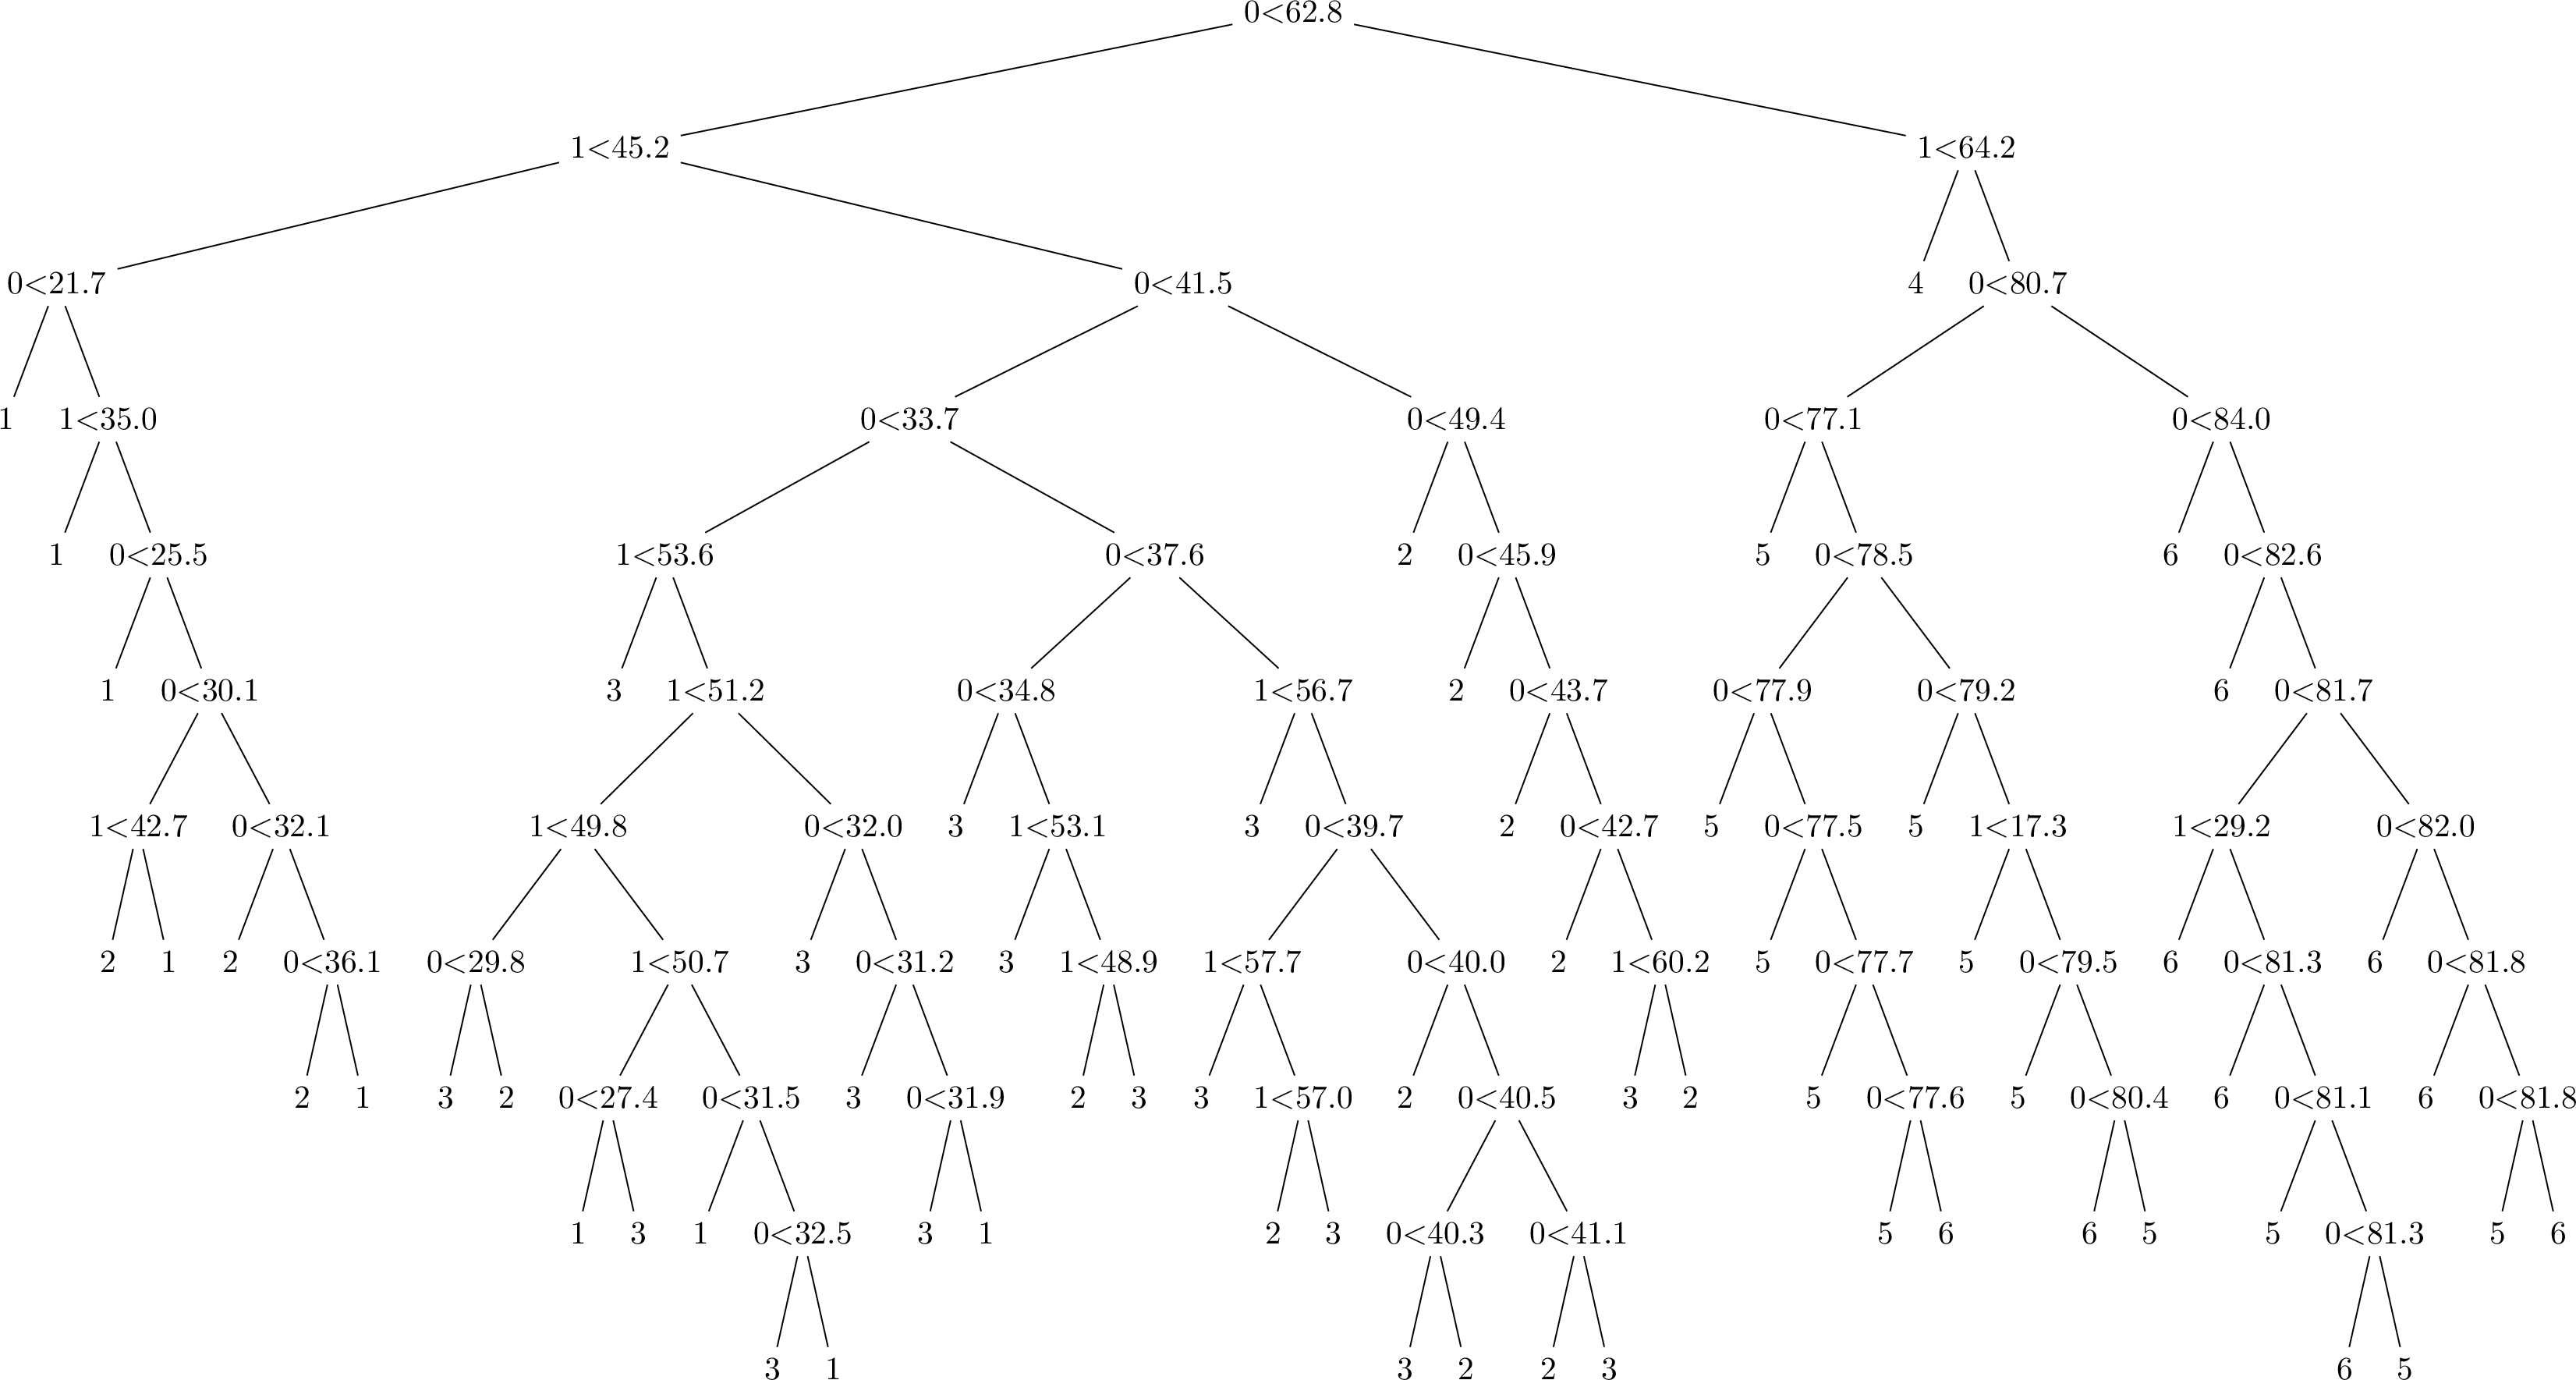

In [37]:
def tree_visualize(root_node):
    tree_string = ""
    tree_string = print_decision_tree_latex(root_node, tree_string)
    
    rep = "cd ../Figures/decision_tree;"
    os.system(rep + "rm decision_tree.tex; more main_pt1.tex >> decision_tree.tex; echo '' >> decision_tree.tex;")
    os.system(rep + "echo '" + tree_string + "' >> decision_tree.tex;  more main_pt2.tex >> decision_tree.tex;")
    os.system(rep + "Library/TeX/texbin/pdflatex decision_tree.tex;")
    os.system(rep + "convert -density 300 -trim decision_tree.pdf -quality 100 decision_tree.png")
    os.system(rep + "rm *.aux *.log")
    display(Image('../Figures/decision_tree/decision_tree.png', retina=True))
    
tree_visualize(root)

We can see that the Decision Tree overfits and creates way too many splits. We will thus train many individual trees on a subset of the data.


# Random Forest
- Draw random subsamples of data with replacement
- Create individual decision trees on subsamples
- Visualize decision boundaries

In [38]:
# build random forest
root_nodes = random_forest_build(dataset, 1000, .3, n_jobs=-1)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    9.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   22.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   40.8s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   50.8s finished


In [39]:
# evaluate labels of original dataset using RF
dataset_test = dataset[:, :2]
dataset_eval = random_forest_traverse(dataset_test, root_nodes)

HBox(children=(IntProgress(value=0, max=300), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

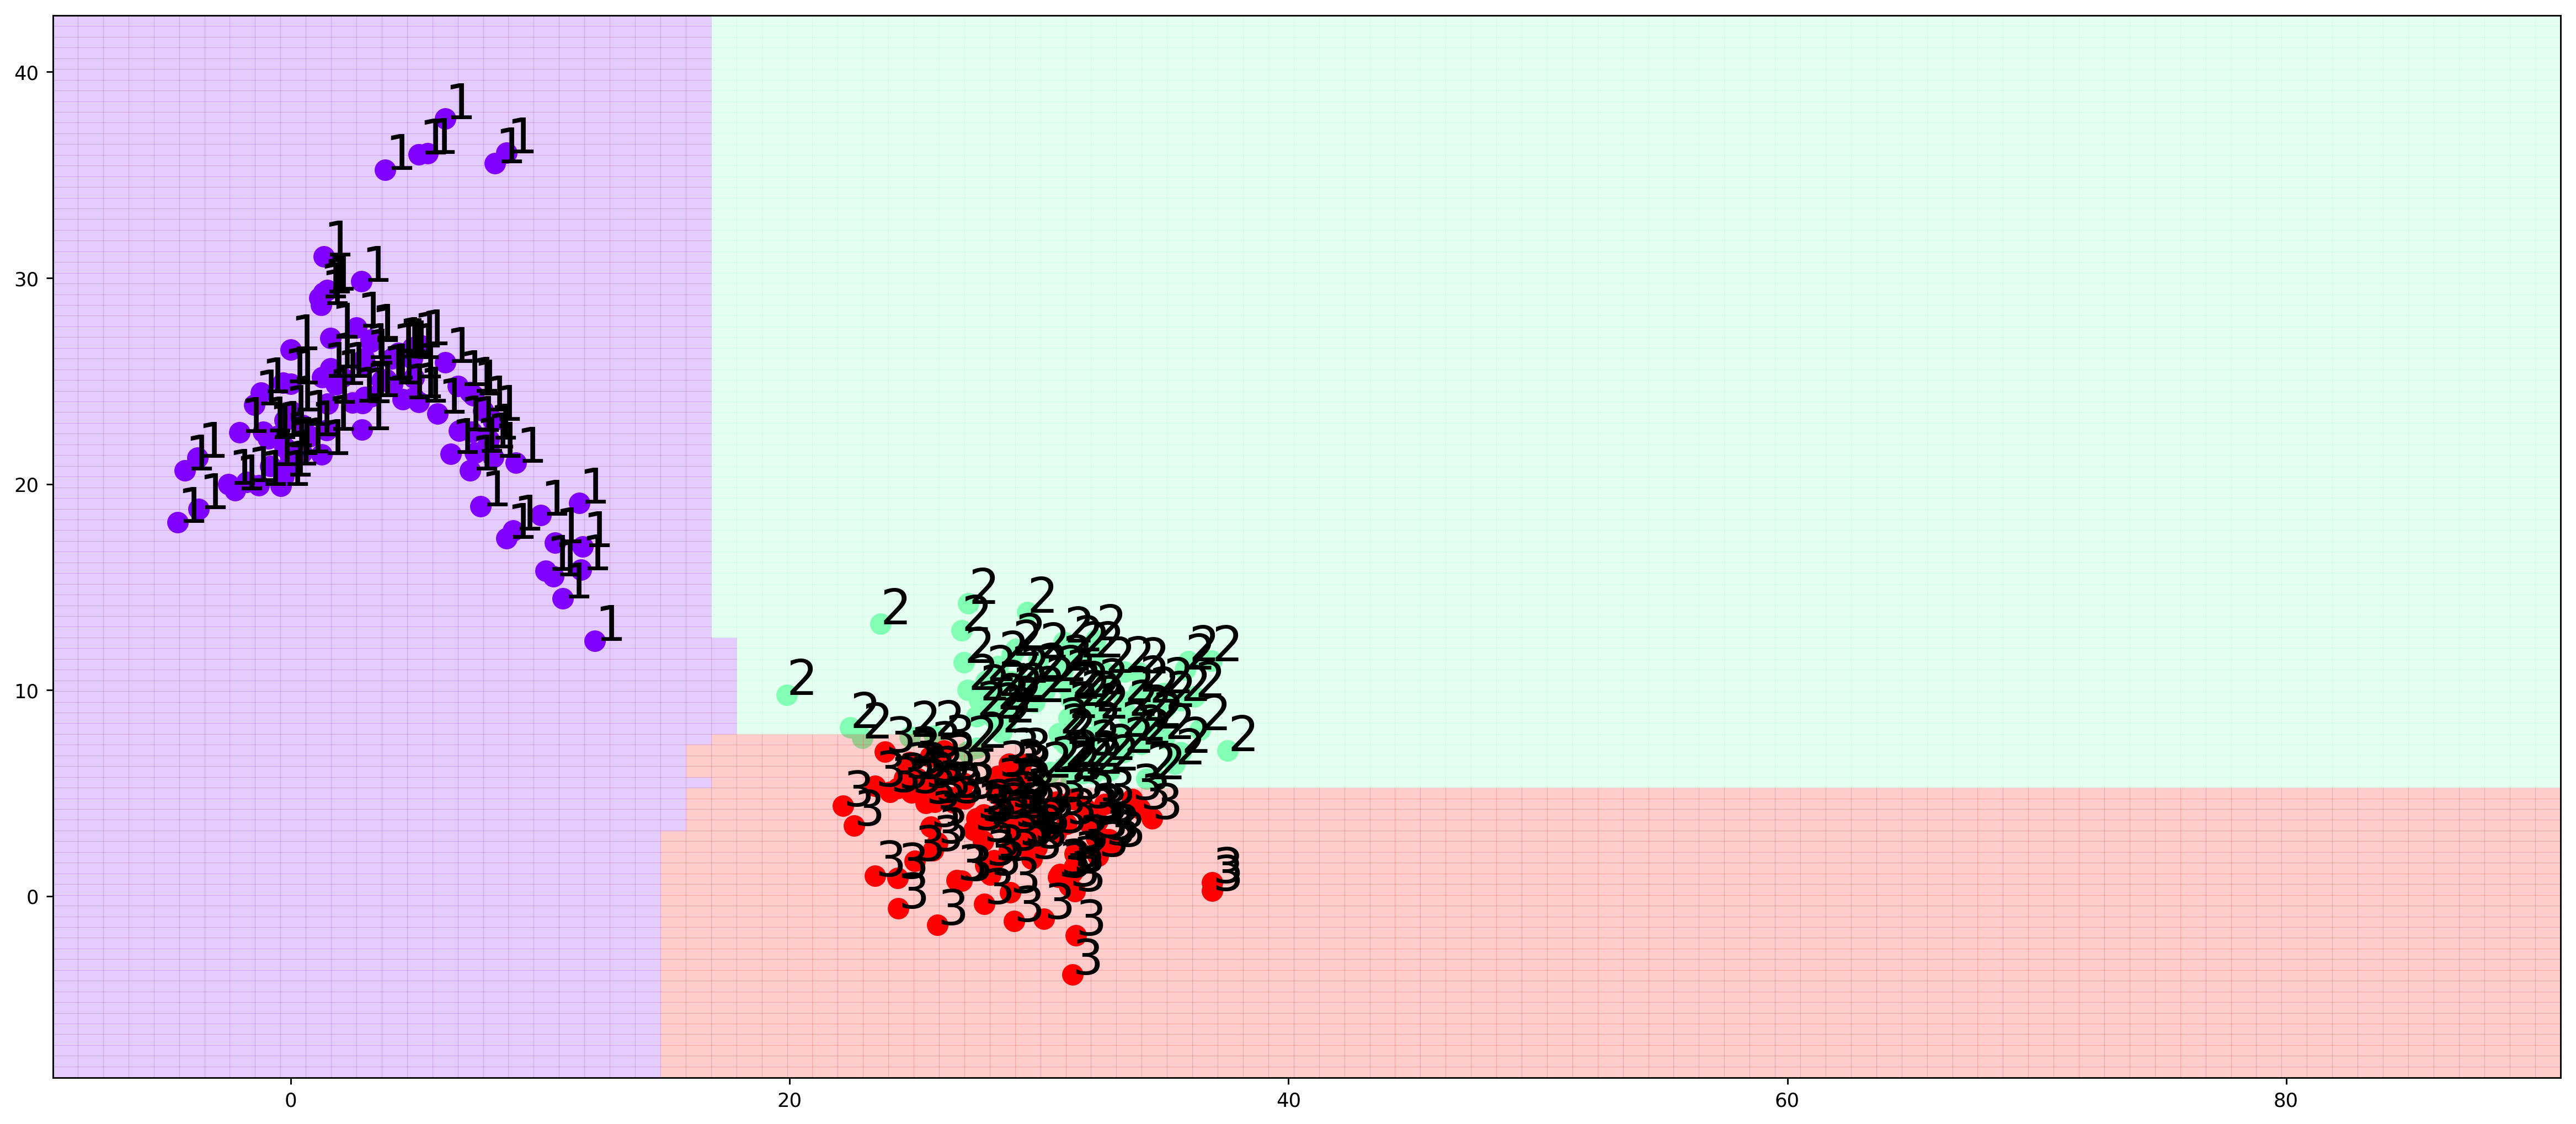

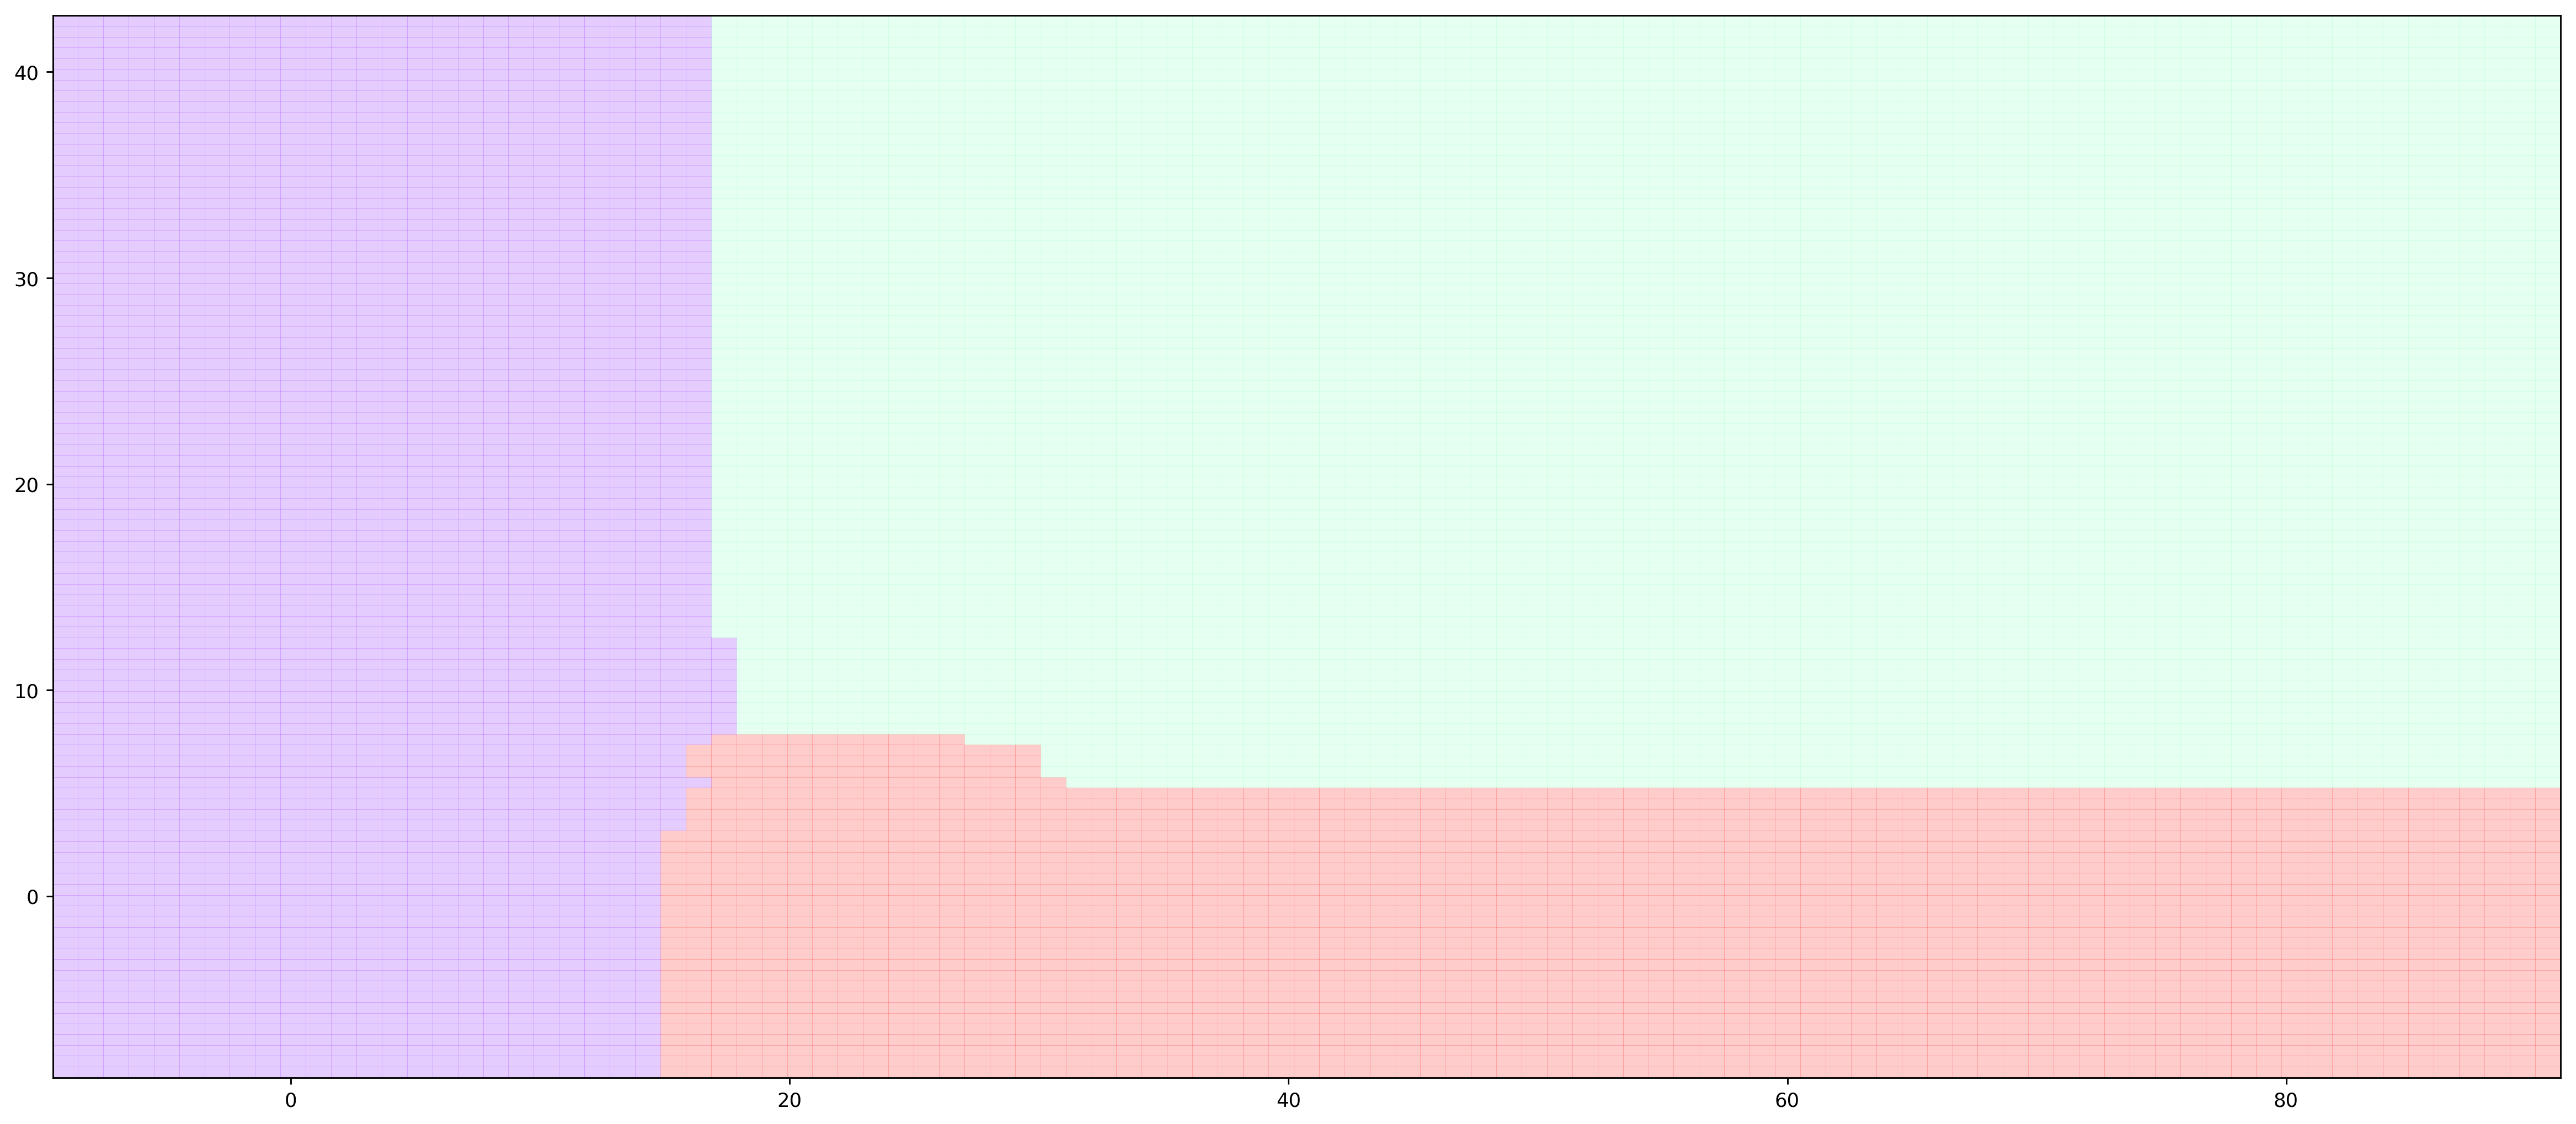

In [40]:
# show data using Random Forests
savename=['../Figures/decision_tree/rf.pdf', '../Figures/decision_tree/rf_nopoints.pdf']
visualize_decision_boundaries(dataset_eval, root_nodes, minRange, maxRange, margin=margin, rf=True, savename=savename)